<a href="https://colab.research.google.com/github/Vixuz144/Econometria/blob/main/Tema20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
import datetime

In [105]:
!git clone https://github.com/Vixuz144/Econometria

Cloning into 'Econometria'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 604.23 KiB | 4.72 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [106]:
cd Econometria

/content/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria


In [107]:
primera_fecha = datetime.datetime.fromisoformat("2003-12-01")
ultima_fecha = datetime.datetime.fromisoformat("2022-04-01")
#print(primera_fecha)
#print(ultima_fecha)

In [108]:
base1  = pd.read_excel("Base TS_Mex.xlsx")

In [109]:
a = base1.to_numpy()
base = np.delete(a, 0, 0)

l = list(base[:,0]).index(primera_fecha)
# m = list(base[:,0]).index(ultima_fecha)
m = datetime.datetime.fromisoformat("2022-04-01")
#print(l)

for i in range(l):
  base = np.delete(base,0,0)
#print(base)

n = len(base[:,1])

In [110]:
meses = np.array([])
for i in range(0,n):
  meses = np.append(meses,base[i,0].month)

t12 = pd.get_dummies(meses).to_numpy()
print(t12)
# t11 = np.delete(t12,-1,1)
# print(t11[-5,:])
# unos = np.ones(n)

x_mes = np.stack([np. ones(n), t12[:, 1], t12[:, 2], t12[:, 3], t12[:, 4], t12[:, 5], t12[:, 6], t12[:, 7], t12[:, 8], t12[:, 9], t12[:, 10], t12[:, 11]], axis = 1)
# print(x_mes)

[[False False False ... False False  True]
 [ True False False ... False False False]
 [False  True False ... False False False]
 ...
 [False  True False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]


In [111]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 1], float)))

#unos = np.ones(n)
materias_primas_no_alimenticias = 100 * np.diff(np.log(np.array(base[:, 8], float)))
materias_primas = 100 * np.diff(np.log(np.array(base[:, 7], float)))
holgura = 100 * np.diff(np.log(np.array(base[:, 9], float)))
salarios = 100 * np.diff(np.log(np.array(base[:, 6], float)))
energeticos = 100 * np.diff(np.log(np.array(base[:, 5], float)))
tipo_cambio = 100 * np.diff(np.log(np.array(base[:, 4], float)))

#print(np.exp(energeticos/100))
#print(energeticos)

x1 = np.stack((np.ones(n-1), materias_primas_no_alimenticias, materias_primas, holgura, salarios, energeticos, tipo_cambio), axis = 1)
# print(y1.shape)
#print(x1)


In [112]:
xm = x_mes[1:, :]
At = np.transpose(xm).dot(xm)
Bt = np.transpose(xm).dot(y1)
n_gamma = len(At)
gamma_est = np.linalg.solve(At,Bt)
y_mes = np.dot(xm,gamma_est)
res_gamma = y1 - y_mes
gamma_mes = gamma_est + np.mean(y1)



it = np.linalg.inv(At)
var_mes = np.diag(np.var(res_gamma,ddof=n_gamma)*it)
desv_mes = np.sqrt(var_mes)


A = np.transpose(x1).dot(x1)
B = np.transpose(x1).dot(y1)
n_beta = len(A)
beta_est =  np.linalg.solve(A,B)
#print(beta_est)

y1_est = x1.dot(beta_est)
e_est = y1 - y1_est

ix = np.linalg.inv(A)
var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
desv_x = np.sqrt(var_x)

In [113]:
n_param = len(gamma_est)
grad_lib1 = n - n_param
print(grad_lib1)
t_stad1 = gamma_est/desv_mes

n_param = len(beta_est)
grad_lib2 = n - n_param
print(grad_lib2)
t_stad2 = beta_est/desv_x
# print(t_stad1)
# print(t_stad2)
t_stad = np.concatenate((t_stad1, t_stad2))
#print(t_stad)

p_val1 = t.cdf(-np.abs(t_stad1), grad_lib1) + 1 - t.cdf(np.abs(t_stad1), grad_lib1)
p_val2 = t.cdf(-np.abs(t_stad2), grad_lib2) + 1 - t.cdf(np.abs(t_stad2), grad_lib2)

p_val = np.concatenate((p_val1, p_val2))
print(p_val)

209
214
[0.00000000e+00 3.40282119e-02 1.10016444e-01 1.85336191e-11
 0.00000000e+00 1.95287178e-05 2.55428337e-02 8.07084470e-03
 5.35557522e-01 9.22348078e-01 7.83640969e-03 5.09667370e-01
 0.00000000e+00 3.35580611e-01 3.55718210e-01 9.18726361e-01
 9.13497434e-01 1.14677646e-05 9.84070463e-01]


In [114]:
esti = np.concatenate((gamma_est, beta_est))
desv = np.concatenate((desv_mes, desv_x))
tabla = pd.DataFrame(np.round(np.stack((esti, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'const2', 'materias primas no alimenticias', 'materias primas', 'holgura', 'salarios', 'energeticos', 'tipo de cambio'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

                                 beta_hat     desv    t_stad    p_val
const                             0.55271  0.05754   9.60563  0.00000
feb                              -0.17363  0.08137  -2.13376  0.03403
mar                              -0.13060  0.08137  -1.60494  0.11002
abril                            -0.57823  0.08137  -7.10578  0.00000
may                              -0.83656  0.08250 -10.14052  0.00000
jun                              -0.36055  0.08250  -4.37048  0.00002
jul                              -0.18555  0.08250  -2.24920  0.02554
ago                              -0.22066  0.08250  -2.67473  0.00807
sep                              -0.05119  0.08250  -0.62057  0.53556
oct                              -0.00805  0.08250  -0.09759  0.92235
nov                               0.22150  0.08250   2.68494  0.00784
dic                              -0.05449  0.08250  -0.66049  0.50967
const2                            0.32623  0.02603  12.53351  0.00000
materias primas no a

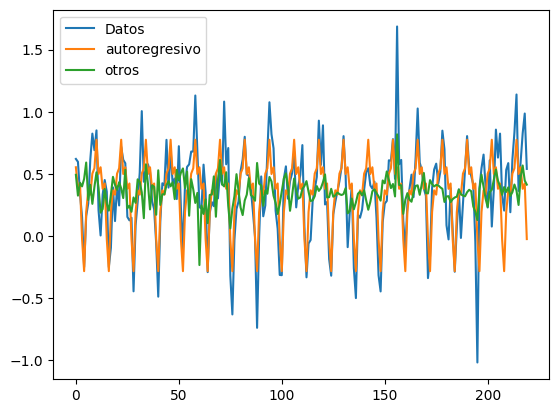

In [115]:
plt.plot(y1, label='Datos')
plt.plot(y_mes,label='autoregresivo')
plt.plot(y1_est,label='otros')
plt.legend()
plt.show()

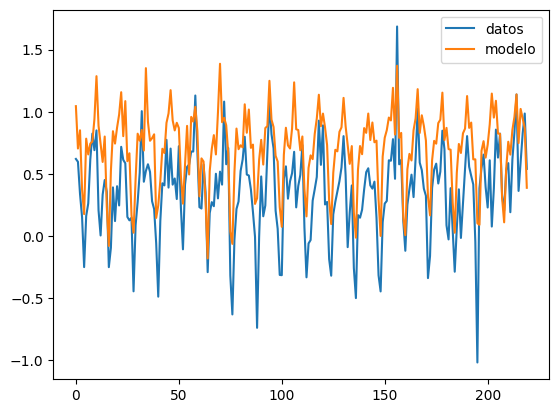

In [116]:
plt.plot(y1,label='datos')
plt.plot(y_mes+y1_est,label='modelo')
plt.legend()
plt.show()